# Load Spark

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("test_pyspark") \
    .config("spark.driver.memory", "100g") \
    .config("spark.executor.memory", "100g") \
    .config("spark.sql.orc.enableVectorizedReader", "false") \
    .config("spark.sql.parquet.columnarReaderBatchSize", "256") \
    .config("spark.sql.orc.columnarReaderBatchSize", "256") \
    .config("spark.sql.shuffle.partitions", "1024") \
    .config("spark.driver.maxResultSize", "4g") \
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/12 08:26:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
combined_df = spark.table("dn_labels_combined")

# Create dedup data

In [11]:
combined_distinct_df = combined_df.distinct().orderBy("id", "label", "type")

dedup_data = combined_distinct_df.toPandas()

null_count = dedup_data[dedup_data["id"].isnull()].shape[0]
# format null_nums 5 digit number starting from 00000
null_nums = [f"null{num:05d}" for num in range(0, null_count)]
dedup_data.loc[dedup_data["id"].isnull(), "id"] = null_nums
dedup_data.loc[dedup_data["type"].isnull(), "type"] = "missing"
# Name index idx
dedup_data.index.name = "idx"

dedup_data

,label,id,type,source
idx,,,,
0,Children,null00000,missing,subject
1,Criminal law,null00001,missing,subject
2,Gender roles,null00002,missing,subject
3,Law,null00003,missing,subject
4,Police,null00004,missing,subject
...,...,...,...,...
646781,Pregnant teenagers - Great Britain - Diaries,zzzvtr3f,Concept,subject
646782,"Maddox, Lucy",zzzw65be,Person,contributor
646783,"Rockliffe, Richard William.",zzzwgbkn,Person,contributor


### Find rows that label contains "Florence"

In [34]:
florence_rows = dedup_data[dedup_data['label'].str.contains(
    "Florence", case=False, na=False) & dedup_data['label'].str.contains(
    "Nigh", case=False, na=False)].sort_values(by='id', ascending=True)
florence_rows

,label,id,type,source
idx,,,,
87516,"Nightingale, Florence, 1820-1910.",d4rsp2n3,Person,contributor
87517,"Nightingale, Florence, 1820-1910. Notes on nur...",d4rsp2n3,Agent,contributor
87518,"Nightingale, Florence, 1820-1910. Notes on nur...",d4rsp2n3,Person,subject
87519,"Nightingale, Florence, 1820-1910. Notes on nur...",d4rsp2n3,Agent,contributor
87900,"Florence Nightingale Museum (London, England)",d56fkgss,Organisation,subject
91691,École Florence Nightingale de Bordeaux,d9d45nkh,Organisation,contributor
98931,National Florence Nightingale Memorial Committ...,dhayqztj,Organisation,contributor
136958,"Nightingale, Florence (1820-1910)",euzka9gm,Organisation,subject
136957,"Nightingale, Florence (1820-1910)",euzka9gm,Agent,contributor


In [ ]:
from wc_simd.dedupe_service import dedup_data_file

# Convert all columns to string type
dedup_data = dedup_data.astype(str)
dedup_data.reset_index(inplace=True)
dedup_data.rename(columns={"index": "idx"}, inplace=True)

dedup_data.to_csv("../" + dedup_data_file, index=True)

## Load dedup data

In [62]:
import pandas as pd
from wc_simd.dedupe_service import dedup_data_file
dedup_data = pd.read_csv("../" + dedup_data_file, index_col=0)

# force all columns to string type
dedup_data = dedup_data.astype(str)

dedup_data

,label,id,type,source
idx,,,,
0,Children,null00000,missing,subject
1,Criminal law,null00001,missing,subject
2,Gender roles,null00002,missing,subject
3,Law,null00003,missing,subject
4,Police,null00004,missing,subject
...,...,...,...,...
646781,Pregnant teenagers - Great Britain - Diaries,zzzvtr3f,Concept,subject
646782,"Maddox, Lucy",zzzw65be,Person,contributor
646783,"Rockliffe, Richard William.",zzzwgbkn,Person,contributor


# Train Model

In [63]:
train_data = {idx: {"label": str(row.label), "type": str(row.type)}
              for idx, row in dedup_data.iterrows()}

In [64]:
import dedupe
from wc_simd.dedupe_service import training_file, settings_file, fields

dedupe = dedupe.Dedupe(fields, num_cores=8)
with open("../" + training_file) as tf:
    dedupe.prepare_training(train_data, training_file=tf)
    dedupe.train(recall=1.0)
    with open("../" + settings_file, "wb") as sf:
        dedupe.write_settings(sf)
    dedupe.cleanup_training()

INFO:dedupe.api:reading training from file
INFO:dedupe.canopy_index:Removing stop word  1
INFO:dedupe.canopy_index:Removing stop word  B
INFO:dedupe.canopy_index:Removing stop word  W
INFO:dedupe.canopy_index:Removing stop word 19
INFO:dedupe.canopy_index:Removing stop word al
INFO:dedupe.canopy_index:Removing stop word ar
INFO:dedupe.canopy_index:Removing stop word d 
INFO:dedupe.canopy_index:Removing stop word es
INFO:dedupe.canopy_index:Removing stop word ll
INFO:dedupe.canopy_index:Removing stop word lo
INFO:dedupe.canopy_index:Removing stop word ns
INFO:dedupe.canopy_index:Removing stop word on
INFO:dedupe.canopy_index:Removing stop word or
INFO:dedupe.canopy_index:Removing stop word r 
INFO:dedupe.canopy_index:Removing stop word s 
INFO:dedupe.canopy_index:Removing stop word st
INFO:dedupe.canopy_index:Removing stop word t 
INFO:dedupe.canopy_index:Removing stop word  S
INFO:dedupe.canopy_index:Removing stop word  a
INFO:dedupe.canopy_index:Removing stop word at
INFO:dedupe.canop

# Load Model

In [73]:
from dedupe import StaticDedupe
from wc_simd.dedupe_service import settings_file

with open("../" + settings_file, 'rb') as f:
    dedupe = StaticDedupe(f, num_cores=48)

INFO:dedupe.api:Predicate set:
INFO:dedupe.api:SimplePredicate: (metaphoneToken, label)
INFO:dedupe.api:TfidfNGramCanopyPredicate: (0.6, label)


# Create blocking map

### Non-Spark blocking

In [6]:
for field in dedupe.fingerprinter.index_fields:
    print(f"Indexing field: {field}")
    field_data = dedup_data[field].dropna().unique()
    dedupe.fingerprinter.index(field_data, field)

fingerprint_data = ((idx, dict(label=str(row.label), type=str(row.type))) for idx, row in dedup_data.iterrows())
blocked_data = dedupe.fingerprinter(fingerprint_data)

Indexing field: label


INFO:dedupe.canopy_index:Removing stop word en
INFO:dedupe.canopy_index:Removing stop word hi
INFO:dedupe.canopy_index:Removing stop word il
INFO:dedupe.canopy_index:Removing stop word re
INFO:dedupe.canopy_index:Removing stop word al
INFO:dedupe.canopy_index:Removing stop word in
INFO:dedupe.canopy_index:Removing stop word l 
INFO:dedupe.canopy_index:Removing stop word la
INFO:dedupe.canopy_index:Removing stop word mi
INFO:dedupe.canopy_index:Removing stop word na
INFO:dedupe.canopy_index:Removing stop word ri
INFO:dedupe.canopy_index:Removing stop word de
INFO:dedupe.canopy_index:Removing stop word er
INFO:dedupe.canopy_index:Removing stop word es
INFO:dedupe.canopy_index:Removing stop word le
INFO:dedupe.canopy_index:Removing stop word nd
INFO:dedupe.canopy_index:Removing stop word ol
INFO:dedupe.canopy_index:Removing stop word r 
INFO:dedupe.canopy_index:Removing stop word ro
INFO:dedupe.canopy_index:Removing stop word ce
INFO:dedupe.canopy_index:Removing stop word ic
INFO:dedupe.c

In [7]:
blocking_map_df = pd.DataFrame(blocked_data, columns=["block_key", "idx"])
blocking_map_df.set_index("block_key", inplace=True)
blocking_map_df.to_csv("../data/dn_blocking_map.csv", index=True)
blocking_map_df

INFO:dedupe.blocking:10000, 49.3339992 seconds
INFO:dedupe.blocking:20000, 96.8617832 seconds
INFO:dedupe.blocking:30000, 145.0157332 seconds
INFO:dedupe.blocking:40000, 192.4545932 seconds
INFO:dedupe.blocking:50000, 240.3034472 seconds
INFO:dedupe.blocking:60000, 287.2539652 seconds
INFO:dedupe.blocking:70000, 334.8818392 seconds
INFO:dedupe.blocking:80000, 381.2869332 seconds
INFO:dedupe.blocking:90000, 427.5550872 seconds
INFO:dedupe.blocking:100000, 473.5669682 seconds
INFO:dedupe.blocking:110000, 519.5707562 seconds
INFO:dedupe.blocking:120000, 564.8470762 seconds
INFO:dedupe.blocking:130000, 609.1641872 seconds
INFO:dedupe.blocking:140000, 654.5004882 seconds
INFO:dedupe.blocking:150000, 698.8562642 seconds
INFO:dedupe.blocking:160000, 743.1132612 seconds
INFO:dedupe.blocking:170000, 786.7427062 seconds
INFO:dedupe.blocking:180000, 831.3015892 seconds
INFO:dedupe.blocking:190000, 875.3178072 seconds
INFO:dedupe.blocking:200000, 918.4827672 seconds
INFO:dedupe.blocking:210000, 96

,idx
block_key,
XLTRN:0,0
1:1,0
L:0,1
KRMNL:0,1
LF:0,1
...,...
105967:1,646784
RPRT:0,646785
KTFRT:0,646785


In [1]:
# Load the blocking map
import pandas as pd


blocking_map_df = pd.read_csv("../data/dn_blocking_map.csv", index_col=0)
blocking_map_df

,idx
block_key,
XLTRN:0,0
1:1,0
L:0,1
KRMNL:0,1
LF:0,1
...,...
105967:1,646784
RPRT:0,646785
KTFRT:0,646785


In [2]:
grouped_blocking_map = blocking_map_df.groupby("block_key").size().sort_values(ascending=False)

grouped_blocking_map

block_key
T:0         52156
A:0         45042
AN:0        44804
JN:0        27297
AF:0        25873
            ...  
334390:1        1
334388:1        1
334387:1        1
334384:1        1
XXTSKF:0        1
Length: 382824, dtype: int64

In [3]:
# apply power of 2 to the size of each group
grouped_blocking_map = grouped_blocking_map.apply(lambda x: x ** 2)
grouped_blocking_map.sum()


16449463959

## Filter Blocking to Person and Agent only

In [7]:
# Filter Blocking to Person and Agent only
# Join with training data
blocking_map_persons_only_df = blocking_map_df.reset_index().set_index("idx").join(dedup_data[["type"]], on="idx").query("type in ['Person', 'Agent']")
blocking_map_persons_only_df

,block_key,type
idx,,
9,KFR:0,Person
9,P:0,Person
9,PRN:0,Person
9,NLSN:0,Person
9,JFR:0,Person
...,...,...
646783,FLM:0,Person
646785,RPRT:0,Person
646785,KTFRT:0,Person


In [8]:
# Group and name size column
blocking_map_persons_only_group_size_df = blocking_map_persons_only_df.groupby(
    "block_key").size().sort_values(ascending=False)

blocking_map_persons_only_group_size_df = blocking_map_persons_only_group_size_df.rename_axis("block_key").reset_index(name="size")

blocking_map_persons_only_group_size_df

,block_key,size
0,A:0,42114
1,AN:0,32297
2,T:0,30228
3,JN:0,26586
4,K:0,20852
...,...,...
276669,330855:1,1
276670,330858:1,1
276671,330859:1,1
276672,330862:1,1


In [42]:
# Find all rows with 87516 or 184757
flo_ntn_blocks_df = blocking_map_persons_only_df[blocking_map_persons_only_df.index.isin([87516, 184757])]
flo_ntn_blocks_df

,block_key,type
idx,,
87516,FLRNS:0,Person
87516,NTNKL:0,Person
87516,80814:1,Person
184757,FLRNS:0,Person
184757,NTNKL:0,Person
184757,80814:1,Person


In [44]:
# Get size of group of block_key found in flo_ntn_blocks_df
blocking_map_persons_only_group_size_df[blocking_map_persons_only_group_size_df["block_key"].isin(flo_ntn_blocks_df["block_key"])]

,block_key,size
833,FLRNS:0,228
2807,NTNKL:0,44
9777,80814:1,8


In [46]:
# filter out top 1% by size column
blocking_map_persons_only_group_size_filtered_df = blocking_map_persons_only_group_size_df[blocking_map_persons_only_group_size_df["size"] < blocking_map_persons_only_group_size_df["size"].quantile(0.998)]
blocking_map_persons_only_group_size_filtered_df

,block_key,size
556,PSN:0,358
557,MRX:0,357
558,FRL:0,356
559,FRK:0,356
560,FNS:0,356
...,...,...
276669,330855:1,1
276670,330858:1,1
276671,330859:1,1
276672,330862:1,1


In [10]:
blocking_map_persons_only_group_size_filtered_df["size"].apply(lambda x: x ** 2).sum()

11151784

In [47]:
# Inner join to filter blocking_map_persons_only with
# blocking_map_persons_only_group_size_filtered_df
#
blocking_map_persons_only_filtered_df = (
    # blocking_map_persons_only_df[blocking_map_persons_only_df["block_key"].isin(blocking_map_persons_only_group_size_filtered_df["block_key"])]
    blocking_map_persons_only_df[blocking_map_persons_only_df["block_key"].isin(
        flo_ntn_blocks_df["block_key"])]
    [["block_key"]]
    .reset_index()
    .set_index("block_key")
)
blocking_map_persons_only_filtered_df

,idx
block_key,
FLRNS:0,369
FLRNS:0,1726
FLRNS:0,1794
FLRNS:0,7078
FLRNS:0,8121
...,...
FLRNS:0,636322
FLRNS:0,638080
FLRNS:0,638861


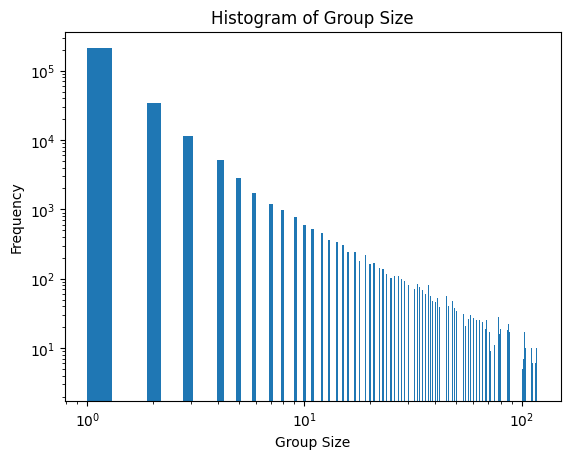

In [81]:
# Histogram of group size
import matplotlib.pyplot as plt

plt.hist(blocking_map_persons_only_filtered_df.groupby(
    "block_key").size(), bins=400)
plt.xlabel("Group Size")
plt.ylabel("Frequency")
plt.title("Histogram of Group Size")
# use log scale
plt.xscale("log")
plt.yscale("log")
plt.show()

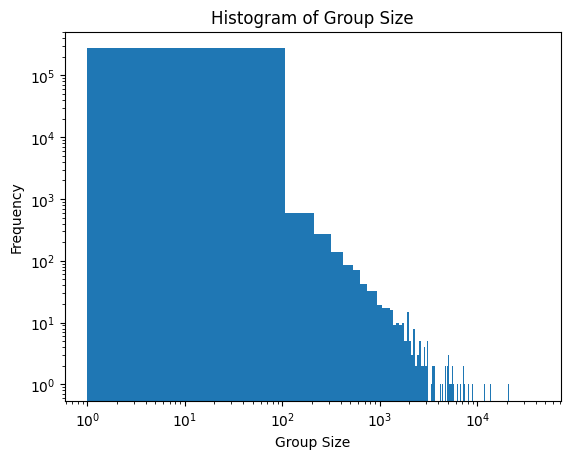

In [82]:
# Histogram of group size
import matplotlib.pyplot as plt

plt.hist(blocking_map_persons_only_df.groupby("block_key").size(), bins=400)
plt.xlabel("Group Size")
plt.ylabel("Frequency")
plt.title("Histogram of Group Size")
# use log scale
plt.xscale("log")
plt.yscale("log")
plt.show()

# Prep dictionary pairs

In [48]:
full_data_df = pd.DataFrame(
    ((idx,
    dict(
        label=str(
            row["label"]),
            type=str(
                row["type"]))) for idx,
                row in dedup_data.iterrows()),
                columns=[
                    "idx",
                     "dict"])
full_data_df.set_index("idx", inplace=True)
full_data_df

,dict
idx,
0,"{'label': 'Children', 'type': 'missing'}"
1,"{'label': 'Criminal law', 'type': 'missing'}"
2,"{'label': 'Gender roles', 'type': 'missing'}"
3,"{'label': 'Law', 'type': 'missing'}"
4,"{'label': 'Police', 'type': 'missing'}"
...,...
646781,{'label': 'Pregnant teenagers - Great Britain ...
646782,"{'label': 'Maddox, Lucy', 'type': 'Person'}"
646783,"{'label': 'Rockliffe, Richard William.', 'type..."


## Join dictionary pairs with blocking map

In [49]:
blocking_result_df = (
    blocking_map_persons_only_filtered_df.join(
        blocking_map_persons_only_filtered_df,
        rsuffix="_r",
        on="block_key") .query('idx < idx_r') .join(
            full_data_df,
            on="idx") .join(
                full_data_df,
                on="idx_r",
                 rsuffix="_r") )
blocking_result_df

,idx,idx_r,dict,dict_r
block_key,,,,
FLRNS:0,369,1726,"{'label': 'Seibert, Florence B., 1897-1991.', ...","{'label': 'Pérez Bautista, Florencio L.', 'typ..."
FLRNS:0,369,1794,"{'label': 'Seibert, Florence B., 1897-1991.', ...","{'label': 'Starling, Florence A.', 'type': 'Pe..."
FLRNS:0,369,7078,"{'label': 'Seibert, Florence B., 1897-1991.', ...","{'label': 'Lees, Florence Sarah, 1840-1922.', ..."
FLRNS:0,369,8121,"{'label': 'Seibert, Florence B., 1897-1991.', ...","{'label': 'Flourens, P. (Pierre), 1794-1867', ..."
FLRNS:0,369,8122,"{'label': 'Seibert, Florence B., 1897-1991.', ...","{'label': 'Flourens, P. (Pierre), 1794-1867.',..."
...,...,...,...,...
FLRNS:0,638080,640338,"{'label': 'La Live, Louise Florence Pétronille...","{'label': 'Ball, Florence V.', 'type': 'Person'}"
FLRNS:0,638080,642489,"{'label': 'La Live, Louise Florence Pétronille...","{'label': 'Small, Florence Hardy, 1860?-1933',..."
FLRNS:0,638861,640338,"{'label': 'Gardiner, Florence Mary.', 'type': ...","{'label': 'Ball, Florence V.', 'type': 'Person'}"


In [22]:
blocking_result_df.to_parquet("../data/dn_labels_blocking_map.parquet", index=True)

In [23]:
import pandas as pd
blocking_result_df = pd.read_parquet("../data/dn_labels_blocking_map.parquet")
blocking_result_df

,idx,idx_r,dict,dict_r
block_key,,,,
1:1,0,228859,"{'label': 'Children', 'type': 'missing'}","{'label': 'Children', 'type': 'Concept'}"
1:1,0,264402,"{'label': 'Children', 'type': 'missing'}","{'label': 'Children', 'type': 'Concept'}"
Criminal law:0,1,102628,"{'label': 'Criminal law', 'type': 'missing'}",{'label': 'Criminal law (Roman law) - Early wo...
Criminal law:0,1,180893,"{'label': 'Criminal law', 'type': 'missing'}",{'label': 'Criminal law - United States - Hist...
Criminal law:0,1,306835,"{'label': 'Criminal law', 'type': 'missing'}","{'label': 'Criminal law', 'type': 'Concept'}"
...,...,...,...,...
562276:1,646760,646761,"{'label': 'Mather, Cotton, 1663-1728. Wonders ...","{'label': 'Mather, Cotton, 1663-1728. Wonders ..."
562276:1,646760,646762,"{'label': 'Mather, Cotton, 1663-1728. Wonders ...","{'label': 'Mather, Cotton, 1663-1728. Wonders ..."
Mather Cotton:0,646761,646762,"{'label': 'Mather, Cotton, 1663-1728. Wonders ...","{'label': 'Mather, Cotton, 1663-1728. Wonders ..."


# Score Clusters

In [50]:
blocking_result_df.reset_index()["block_key"].unique().shape

(3,)

In [53]:
blocking_result_df.groupby("block_key").size().sort_values(ascending=False)

block_key
FLRNS:0    25878
NTNKL:0      946
80814:1       28
dtype: int64

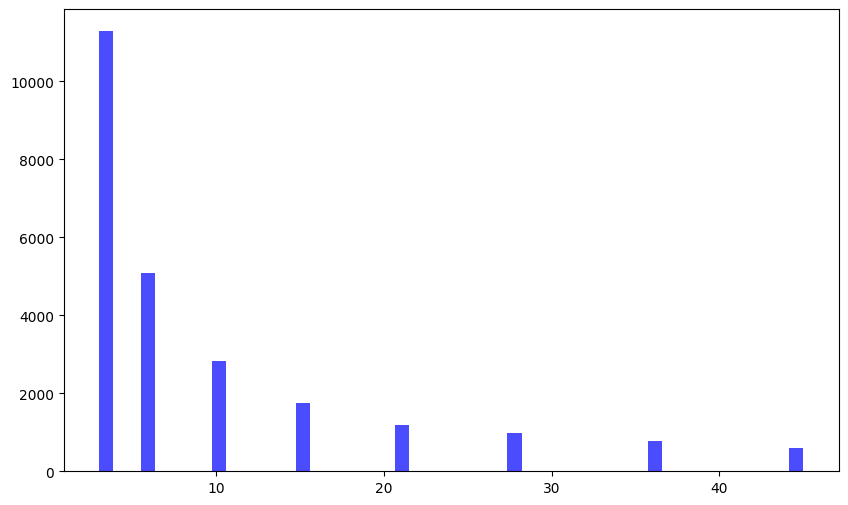

Block sizes statistics:
count    24476.000000
mean         9.218336
std          9.848149
min          3.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         45.000000
dtype: float64


In [15]:
# Histogram of block sizes
import matplotlib.pyplot as plt
%matplotlib inline

block_sizes = blocking_result_df.groupby("block_key").size()
#filter block sizes greater less than 50
block_sizes = block_sizes[(block_sizes < 50) & (block_sizes > 1)]
plt.figure(figsize=(10, 6))
plt.hist(block_sizes, bins=50, color='blue', alpha=0.7)
# plt.title('Distribution of Block Sizes')
# plt.xlabel('Block Size')
# plt.ylabel('Frequency')
# plt.yscale('log')
# plt.grid(axis='y', alpha=0.75)
plt.show()

print("Block sizes statistics:")
print(block_sizes.describe())

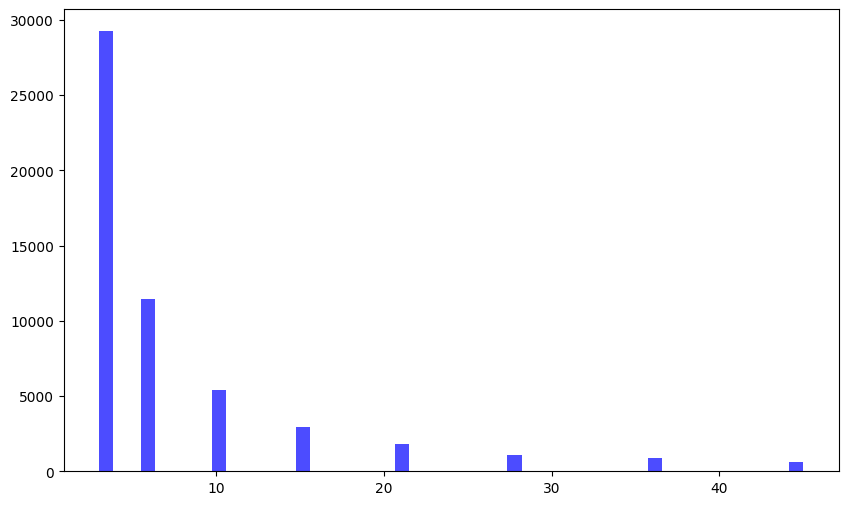

Block sizes statistics:
count    53363.000000
mean         7.129640
std          7.670314
min          3.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         45.000000
dtype: float64


In [ ]:
# Histogram of block sizes
import matplotlib.pyplot as plt
%matplotlib inline

block_sizes = blocking_result_df.groupby("block_key").size()
#filter block sizes greater less than 50
block_sizes = block_sizes[(block_sizes < 50) & (block_sizes > 1)]
plt.figure(figsize=(10, 6))
plt.hist(block_sizes, bins=50, color='blue', alpha=0.7)
# plt.title('Distribution of Block Sizes')
# plt.xlabel('Block Size')
# plt.ylabel('Frequency')
# plt.yscale('log')
# plt.grid(axis='y', alpha=0.75)
plt.show()

print("Block sizes statistics:")
print(block_sizes.describe())

In [16]:
blocking_result_df.shape

(5280567, 4)

In [74]:
# sample_to_cluster_df = blocking_result_df.head(1000000)
sample_to_cluster_df = blocking_result_df
sample_to_cluster_df.shape

(26852, 4)

In [80]:
cluster_data = (((row["idx"], row["dict"]), (row["idx_r"], row["dict_r"]))
                for idx, row in sample_to_cluster_df.iterrows())

clustered_dupes = dedupe.cluster(
    dedupe.score(cluster_data),
    threshold=0.4)

In [81]:
# Persist clustered_dupes

clustered_dupes_list = list(clustered_dupes)


In [ ]:

import pickle
with open("../data/dn_labels_clustered_dupes_list.pkl", "wb") as f:
    pickle.dump(clustered_dupes_list, f)

In [67]:
len(clustered_dupes_list)

22

In [23]:
clustered_dupes_list[:5]

[((341095, 341096), array([0.51425808, 0.51425808])),
 ((23, 524577), array([0.51425808, 0.51425808])),
 ((596190, 596191, 596192), array([0.49727942, 0.50569585, 0.50569585])),
 ((43, 44, 45), array([0.49843072, 0.50628097, 0.50628097])),
 ((79, 80), (0.5142581, 0.5142581))]

In [24]:
# load clustered_dupes
import pickle
with open("../data/dn_labels_clustered_dupes_list.pkl", "rb") as f:
    clustered_dupes_list = pickle.load(f)

In [82]:

def cluster_ids(dupes):
    for indexes, scores in dupes:
        cluster_idx = indexes[0]
        for entry_idx, score in zip(indexes, scores):
            # if entry_idx == cluster_idx:
            #     continue
            yield entry_idx, cluster_idx, score


clustered_dupes_df = pd.DataFrame(
    cluster_ids(clustered_dupes_list), columns=[
        "id", "canon_id", "prob"]).set_index("id")
clustered_dupes_df

,canon_id,prob
id,,
369,369,0.450862
65498,369,0.450862
8121,8121,0.418061
8122,8121,0.460859
8123,8121,0.460859
...,...,...
575695,491534,0.552356
563439,563439,0.514258
563440,563439,0.514258


In [26]:
clustered_dupes_df.to_csv("../data/dn_labels_clustered_dupes.csv", index=True)

In [27]:
import pandas as pd

clustered_dupes_df = pd.read_csv("../data/dn_labels_clustered_dupes.csv", index_col="id")
clustered_dupes_df.sort_values(by="canon_id", ascending=False)

,canon_id,prob
id,,
646699,646698,0.504632
646698,646698,0.504632
646680,646680,0.504827
646681,646680,0.504827
646576,646576,0.514258
...,...,...
45,43,0.506281
44,43,0.506281
43,43,0.498431


In [59]:
import pandas as pd
from wc_simd.dedupe_service import dedup_data_file

dedup_data = pd.read_csv("../" + dedup_data_file, index_col=0)
dedup_data = dedup_data.astype(str)
dedup_data_indexed = dedup_data[["label", "type"]]

In [83]:
dedup_df = (
    clustered_dupes_df
    .join(dedup_data_indexed)
    .reset_index()
    .set_index("canon_id")
    .join(dedup_data_indexed, rsuffix="_canon")
    # .query("prob > 0.52")
    # .sort_values(by=["canon_id"], ascending=True)
    
)
dedup_df

,id,prob,label,type,label_canon,type_canon
369,369,0.450862,"Seibert, Florence B., 1897-1991.",Person,"Seibert, Florence B., 1897-1991.",Person
369,65498,0.450862,"Seibert, Florence B.",Person,"Seibert, Florence B., 1897-1991.",Person
8121,8121,0.418061,"Flourens, P. (Pierre), 1794-1867",Person,"Flourens, P. (Pierre), 1794-1867",Person
8121,8122,0.460859,"Flourens, P. (Pierre), 1794-1867.",Person,"Flourens, P. (Pierre), 1794-1867",Person
8121,8123,0.460859,"Flourens, P. (Pierre), 1794-1867.",Person,"Flourens, P. (Pierre), 1794-1867",Person
...,...,...,...,...,...,...
491534,575695,0.552356,"Miller, Florence Fenwick, 1854-1935.",Person,"Miller, Florence Fenwick, 1854-1935",Agent
563439,563439,0.514258,"Lamot, Florencio Joseph de, 1701-1779.",Person,"Lamot, Florencio Joseph de, 1701-1779.",Person
563439,563440,0.514258,"Lamot, Florencio Joseph de, 1701-1779.",Person,"Lamot, Florencio Joseph de, 1701-1779.",Person
596733,596733,0.514258,"Murray, Florence J., 1894-1975.",Person,"Murray, Florence J., 1894-1975.",Person


In [31]:
dedup_df[~(dedup_df["label"] == dedup_df["label_canon"])]

,id,prob,label,type,label_canon,type_canon
canon_id,,,,,,
596190,596191,0.505696,"Fournier, Alfred, 1832-1914.",Person,"Fournier, Alfred, 1832-1914",Person
596190,596192,0.505696,"Fournier, Alfred, 1832-1914.",Person,"Fournier, Alfred, 1832-1914",Person
43,44,0.506281,"Subba Reddy, D. V., 1899-1987.",Person,"Subba Reddy, D. V., 1899-1987",Person
43,45,0.506281,"Subba Reddy, D. V., 1899-1987.",Person,"Subba Reddy, D. V., 1899-1987",Person
29875,29876,0.505999,"Bottazzi, Filippo, 1867-1941.",Person,"Bottazzi, Filippo, 1867-1941",Person
...,...,...,...,...,...,...
643024,643026,0.493560,"Brian, Kate.",Person,"Brian, Kate",Person
643029,643030,0.506545,"Pelouze, J. (Jules), 1807-1867.",Person,"Pelouze, J. (Jules), 1807-1867",Person
643029,643031,0.506545,"Pelouze, J. (Jules), 1807-1867.",Person,"Pelouze, J. (Jules), 1807-1867",Person


## Check Florence Nightingale

In [32]:
# select rows where label contains "Florence" and "Night

dedup_df[dedup_df['label'].str.contains(
    "Florence", case=False, na=False) & dedup_df['label'].str.contains(
    "Night", case=False, na=False)].sort_values(by='canon_id', ascending=True)

,id,prob,label,type,label_canon,type_canon
canon_id,,,,,,
87516,87516,0.521009,"Nightingale, Florence, 1820-1910.",Person,"Nightingale, Florence, 1820-1910.",Person
87516,87517,0.539844,"Nightingale, Florence, 1820-1910. Notes on nur...",Agent,"Nightingale, Florence, 1820-1910.",Person
87516,87518,0.496240,"Nightingale, Florence, 1820-1910. Notes on nur...",Person,"Nightingale, Florence, 1820-1910.",Person
87516,87519,0.528415,"Nightingale, Florence, 1820-1910. Notes on nur...",Agent,"Nightingale, Florence, 1820-1910.",Person
87516,184753,0.515401,"Nightingale, Florence, 1820-1910",Person,"Nightingale, Florence, 1820-1910.",Person
87516,184754,0.515401,"Nightingale, Florence, 1820-1910",Person,"Nightingale, Florence, 1820-1910.",Person
87516,184756,0.521009,"Nightingale, Florence, 1820-1910.",Person,"Nightingale, Florence, 1820-1910.",Person
87516,184757,0.521009,"Nightingale, Florence, 1820-1910.",Person,"Nightingale, Florence, 1820-1910.",Person
87516,272386,0.559366,"Nightingale, Florence, 1820-1910.",Agent,"Nightingale, Florence, 1820-1910.",Person


## Select Dis-similar rows based on FuzzyWuzzy

In [33]:
# Install fuzzywuzzy if not available
from fuzzywuzzy import fuzz

# Add similarity score column
dedup_df['similarity_score'] = dedup_df.apply(
    lambda row: fuzz.ratio(str(row['label']), str(row['label_canon'])), axis=1
)

# Filter out rows where labels are very similar (e.g., similarity > 90)
similarity_threshold = 95
filtered_dedup_df = dedup_df[(dedup_df['similarity_score'] < similarity_threshold) & ~dedup_df['type'].isin(["Concept", "GenreConcept", "missing", "Organisation", "Place"])]

print(f"Original rows: {len(dedup_df)}")
print(f"Filtered rows (similarity < {similarity_threshold}): {len(filtered_dedup_df)}")
print(f"Removed {len(dedup_df) - len(filtered_dedup_df)} rows with high similarity")

# Show some examples of what was filtered out
high_similarity_df = dedup_df[dedup_df['similarity_score'] >= similarity_threshold]
print(f"\nExample of filtered out rows (high similarity):")
if len(high_similarity_df) > 0:
    print(high_similarity_df[['label', 'label_canon', 'similarity_score']].sample(50).to_markdown())
else:
    print("No rows with high similarity found")

filtered_dedup_df

Original rows: 60123
Filtered rows (similarity < 95): 4365
Removed 55758 rows with high similarity

Example of filtered out rows (high similarity):
|   canon_id | label                                           | label_canon                                     |   similarity_score |
|-----------:|:------------------------------------------------|:------------------------------------------------|-------------------:|
|     322624 | Jecker, Nancy Ann Silbergeld.                   | Jecker, Nancy Ann Silbergeld.                   |                100 |
|     474142 | Cattell, James McKeen, 1860-1944.               | Cattell, James McKeen, 1860-1944.               |                100 |
|     564953 | Hume, Gustavus, 1732-1812.                      | Hume, Gustavus, 1732-1812.                      |                100 |
|     120091 | Wulf, Andrea                                    | Wulf, Andrea                                    |                100 |
|     285629 | Washbourn, J. W. (Joh

,id,prob,label,type,label_canon,type_canon,similarity_score
canon_id,,,,,,,
600829,600831,0.449024,"Atherton, John, 1598-1640 Death and burial",Person,"Atherton, John, 1598-1640",Person,75
442789,534506,0.481169,"Cranstoun, William Henry, 1714-1752",Person,"Cranstoun, William Henry",Person,81
442789,534507,0.479766,"Cranstoun, William Henry, 1714-1752.",Person,"Cranstoun, William Henry",Person,80
499373,524125,0.483220,"Stoever, Dietrich Heinrich, 1767-1822",Person,"Stoever, Dietrich Heinrich",Person,83
499373,524126,0.481879,"Stoever, Dietrich Heinrich, 1767-1822.",Person,"Stoever, Dietrich Heinrich",Person,81
...,...,...,...,...,...,...,...
580914,632973,0.489985,"Fenwick, W. Soltau (William Soltau), 1821-1914",Person,"Fenwick, W. Soltau (William Soltau)",Person,86
580914,632974,0.488875,"Fenwick, W. Soltau (William Soltau), 1821-1914.",Person,"Fenwick, W. Soltau (William Soltau)",Person,85
586006,586009,0.455766,"Wittie, Robert, 1613?-1684. Gout-raptures.",Person,"Wittie, Robert, 1613?-1684",Person,76


In [32]:
filtered_dedup_df.to_csv("../data/dn_labels_filtered_dedup_result.csv", index=True)

In [33]:
# read filtered dedup result
import pandas as pd
filtered_dedup_df = pd.read_csv("../data/dn_labels_filtered_dedup_result.csv", index_col=0)
filtered_dedup_df

,id,prob,label,type,label_canon,type_canon,similarity_score
canon_id,,,,,,,
384580,540144,0.513147,"Wolff, Heinz",Person,"Wolff, Heinz (1928- 2017)",Agent,65
341094,341095,0.487707,Brown.,Person,Brown,Person,91
341094,341096,0.487707,Brown.,Person,Brown,Person,91
148963,289309,0.441364,"Pascal, Blaise, 1623-1662. Provinciales.",Person,"Pascal, Blaise, 1623-1662",Person,77
148963,565378,0.424334,"Pascal, Blaise",Person,"Pascal, Blaise, 1623-1662",Person,72
...,...,...,...,...,...,...,...
639190,639194,0.544778,"Bayle, Antoine Laurent Jessé, 1799-1858. Manue...",Agent,"Bayle, Antoine Laurent Jessé, 1799-1858",Person,73
640751,640754,0.457170,"Hasselquist, Fredrik, 1722-1752. Iter Palaesti...",Person,"Hasselquist, Fredrik, 1722-1752",Person,77
641930,641931,0.511004,"Gillies, R. R. (Robert Reid). Lecture notes on...",Agent,"Gillies, R. R. (Robert Reid)",Person,58


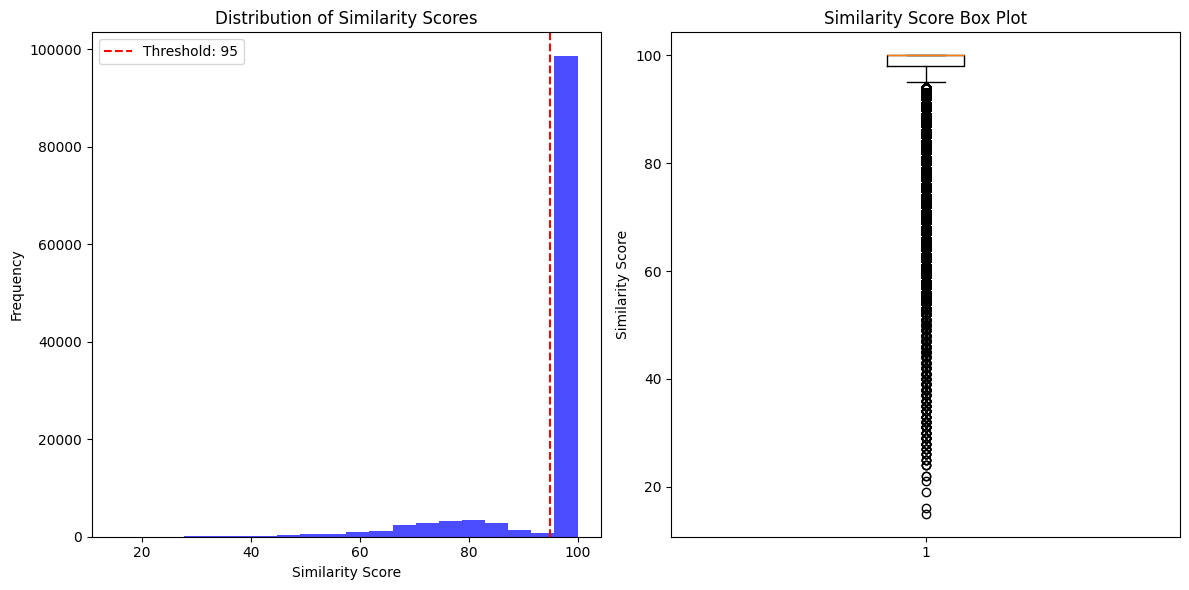

Similarity score statistics:
count    119316.000000
mean         95.210676
std          10.895602
min          15.000000
25%          98.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: similarity_score, dtype: float64

--- Examples by similarity range ---

Very different labels (similarity < 30): 49 rows
                                                      label label_canon  \
canon_id                                                                  
3613      Sex role - United States - History - 19th century    Sex role   
3613      Sex role - United States - History - 20th century    Sex role   
4097        New York (N.Y.). Department of Street Cleaning.    New York   

          similarity_score  
canon_id                    
3613                    28  
3613                    28  
4097                    29  

Moderately similar labels (30-70): 5815 rows
                                                      label  \
canon_id                      

In [57]:
# Analyze similarity score distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histogram of similarity scores
plt.subplot(1, 2, 1)
plt.hist(dedup_df['similarity_score'], bins=20, alpha=0.7, color='blue')
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.axvline(x=similarity_threshold, color='red', linestyle='--', label=f'Threshold: {similarity_threshold}')
plt.legend()

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(dedup_df['similarity_score'])
plt.title('Similarity Score Box Plot')
plt.ylabel('Similarity Score')

plt.tight_layout()
plt.show()

print("Similarity score statistics:")
print(dedup_df['similarity_score'].describe())

# Show examples at different similarity ranges
print("\n--- Examples by similarity range ---")

# Very different labels (low similarity)
low_sim = dedup_df[dedup_df['similarity_score'] < 30]
if len(low_sim) > 0:
    print(f"\nVery different labels (similarity < 30): {len(low_sim)} rows")
    print(low_sim[['label', 'label_canon', 'similarity_score']].head(3))

# Moderately similar labels
med_sim = dedup_df[(dedup_df['similarity_score'] >= 30) & (dedup_df['similarity_score'] < 70)]
if len(med_sim) > 0:
    print(f"\nModerately similar labels (30-70): {len(med_sim)} rows")
    print(med_sim[['label', 'label_canon', 'similarity_score']].head(3))

# Very similar labels (high similarity)
high_sim = dedup_df[dedup_df['similarity_score'] >= 70]
if len(high_sim) > 0:
    print(f"\nVery similar labels (similarity >= 70): {len(high_sim)} rows")
    print(high_sim[['label', 'label_canon', 'similarity_score']].head(3))